In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
data=pd.read_csv('time_series_15min_singleindex.csv')

In [3]:
#Reading the data
data

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,DE_load_actual_entsoe_transparency,...,HU_solar_generation_actual,HU_wind_onshore_generation_actual,LU_load_actual_entsoe_transparency,LU_load_forecast_entsoe_transparency,NL_load_actual_entsoe_transparency,NL_load_forecast_entsoe_transparency,NL_solar_generation_actual,NL_wind_generation_actual,NL_wind_offshore_generation_actual,NL_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-31T23:15:00Z,2015-01-01T00:15:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-31T23:30:00Z,2015-01-01T00:30:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-31T23:45:00Z,2015-01-01T00:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201599,2020-09-30T22:45:00Z,2020-10-01T00:45:00+0200,5482.4,5284.0,NaN,NaN,1740.0,7916.55,8105.94,46229.48,...,NaN,157.28,384.36,382.0,12324.95,12094.02,NaN,908.51,640.25,268.26
201600,2020-09-30T23:00:00Z,2020-10-01T01:00:00+0200,5464.0,5272.0,NaN,NaN,1712.0,7912.79,8025.29,45792.82,...,NaN,153.32,382.41,371.0,12218.53,11950.22,NaN,925.15,669.88,255.27
201601,2020-09-30T23:15:00Z,2020-10-01T01:15:00+0200,5390.4,5200.0,NaN,NaN,1672.0,7818.72,7931.56,45471.18,...,NaN,147.56,378.74,368.0,12076.92,11832.26,NaN,975.34,719.18,256.16
201602,2020-09-30T23:30:00Z,2020-10-01T01:30:00+0200,5329.2,5140.0,NaN,NaN,1600.0,7780.18,7872.25,45119.89,...,NaN,137.19,375.86,369.0,11929.69,11717.22,NaN,976.64,721.50,255.14


In [4]:
#checking basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201604 entries, 0 to 201603
Data columns (total 61 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   utc_timestamp                                    201604 non-null  object 
 1   cet_cest_timestamp                               201604 non-null  object 
 2   AT_load_actual_entsoe_transparency               201598 non-null  float64
 3   AT_load_forecast_entsoe_transparency             201598 non-null  float64
 4   AT_price_day_ahead                               131378 non-null  float64
 5   AT_solar_generation_actual                       201352 non-null  float64
 6   AT_wind_onshore_generation_actual                201406 non-null  float64
 7   BE_load_actual_entsoe_transparency               201598 non-null  float64
 8   BE_load_forecast_entsoe_transparency             201502 non-null  float64
 9   DE_load_actual_

In [5]:
#Column with NaN values
data['DE_LU_load_actual_entsoe_transparency']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
201599    46613.84
201600    46175.23
201601    45849.92
201602    45495.75
201603         NaN
Name: DE_LU_load_actual_entsoe_transparency, Length: 201604, dtype: float64

In [6]:
data['HU_solar_generation_actual']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
201599   NaN
201600   NaN
201601   NaN
201602   NaN
201603   NaN
Name: HU_solar_generation_actual, Length: 201604, dtype: float64

In [7]:
#Droping column with NaN values
data.dropna(axis=1,how='all',inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201604 entries, 0 to 201603
Data columns (total 61 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   utc_timestamp                                    201604 non-null  object 
 1   cet_cest_timestamp                               201604 non-null  object 
 2   AT_load_actual_entsoe_transparency               201598 non-null  float64
 3   AT_load_forecast_entsoe_transparency             201598 non-null  float64
 4   AT_price_day_ahead                               131378 non-null  float64
 5   AT_solar_generation_actual                       201352 non-null  float64
 6   AT_wind_onshore_generation_actual                201406 non-null  float64
 7   BE_load_actual_entsoe_transparency               201598 non-null  float64
 8   BE_load_forecast_entsoe_transparency             201502 non-null  float64
 9   DE_load_actual_

In [9]:
#using Forward Fill
data.fillna(method='ffill',inplace=True)

In [10]:
#using Backward fill
data.fillna(method='bfill',inplace=True)

In [11]:
data.dropna(how='all',inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201604 entries, 0 to 201603
Data columns (total 61 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   utc_timestamp                                    201604 non-null  object 
 1   cet_cest_timestamp                               201604 non-null  object 
 2   AT_load_actual_entsoe_transparency               201604 non-null  float64
 3   AT_load_forecast_entsoe_transparency             201604 non-null  float64
 4   AT_price_day_ahead                               201604 non-null  float64
 5   AT_solar_generation_actual                       201604 non-null  float64
 6   AT_wind_onshore_generation_actual                201604 non-null  float64
 7   BE_load_actual_entsoe_transparency               201604 non-null  float64
 8   BE_load_forecast_entsoe_transparency             201604 non-null  float64
 9   DE_load_actual_

In [13]:
#Changing data type for date column and makeing it as index
data['utc_timestamp']=pd.to_datetime(data['utc_timestamp'])
data.set_index('utc_timestamp', inplace=True)

In [14]:
data.index.dtype

datetime64[ns, UTC]

In [15]:
#Droping the column
data.drop('cet_cest_timestamp',axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201604 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:45:00+00:00
Data columns (total 59 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   AT_load_actual_entsoe_transparency               201604 non-null  float64
 1   AT_load_forecast_entsoe_transparency             201604 non-null  float64
 2   AT_price_day_ahead                               201604 non-null  float64
 3   AT_solar_generation_actual                       201604 non-null  float64
 4   AT_wind_onshore_generation_actual                201604 non-null  float64
 5   BE_load_actual_entsoe_transparency               201604 non-null  float64
 6   BE_load_forecast_entsoe_transparency             201604 non-null  float64
 7   DE_load_actual_entsoe_transparency               201604 non-null  float64
 8   DE_load_forecast_entsoe_transparency            

In [17]:
#checking for duplicates in the index
data.index.duplicated().sum()

0

In [18]:
#checking for duplicates
data.duplicated().sum()

6

In [19]:
data[data.duplicated()]

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,...,HU_solar_generation_actual,HU_wind_onshore_generation_actual,LU_load_actual_entsoe_transparency,LU_load_forecast_entsoe_transparency,NL_load_actual_entsoe_transparency,NL_load_forecast_entsoe_transparency,NL_solar_generation_actual,NL_wind_generation_actual,NL_wind_offshore_generation_actual,NL_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:15:00+00:00,5966.8,6692.23,61.72,1.16,69.96,9575.73,10028.56,41517.72,40204.18,37248.0,...,0.31,12.22,407.00,368.0,9524.00,9081.49,17.00,1447.20,144.72,1302.48
2014-12-31 23:30:00+00:00,5966.8,6692.23,61.72,1.16,69.96,9575.73,10028.56,41517.72,40204.18,37248.0,...,0.31,12.22,407.00,368.0,9524.00,9081.49,17.00,1447.20,144.72,1302.48
2014-12-31 23:45:00+00:00,5966.8,6692.23,61.72,1.16,69.96,9575.73,10028.56,41517.72,40204.18,37248.0,...,0.31,12.22,407.00,368.0,9524.00,9081.49,17.00,1447.20,144.72,1302.48
2015-01-01 00:00:00+00:00,5966.8,6692.23,61.72,1.16,69.96,9575.73,10028.56,41517.72,40204.18,37248.0,...,0.31,12.22,407.00,368.0,9524.00,9081.49,17.00,1447.20,144.72,1302.48
2015-01-01 00:15:00+00:00,5966.8,6692.23,61.72,1.16,69.96,9575.73,10028.56,41517.72,40204.18,37248.0,...,0.31,12.22,407.00,368.0,9524.00,9081.49,17.00,1447.20,144.72,1302.48
2020-09-30 23:45:00+00:00,5329.2,5140.00,22.00,4.00,1600.00,7780.18,7872.25,45119.89,44668.15,50508.0,...,0.01,137.19,375.86,369.0,11929.69,11717.22,0.54,976.64,721.50,255.14


In [20]:
#Droping duplicates
data.drop_duplicates(inplace=True)

In [21]:
data.duplicated().sum()

0

In [22]:
data.describe()

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,...,HU_solar_generation_actual,HU_wind_onshore_generation_actual,LU_load_actual_entsoe_transparency,LU_load_forecast_entsoe_transparency,NL_load_actual_entsoe_transparency,NL_load_forecast_entsoe_transparency,NL_solar_generation_actual,NL_wind_generation_actual,NL_wind_offshore_generation_actual,NL_wind_onshore_generation_actual
count,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,...,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000,201598.000000
mean,7070.161704,7039.857678,29.775928,135.119253,729.271245,9808.396916,9759.255013,55492.589700,54786.366230,43442.914771,...,31.753133,73.972451,470.719147,488.804123,12578.456013,12809.253119,146.067504,971.520319,329.637081,656.059719
std,1403.676483,1357.674902,14.728938,199.579377,693.589871,1398.512250,1383.951289,10041.148871,9524.268267,4861.926138,...,132.039441,76.537669,97.153977,113.484959,2290.400411,2507.304378,321.218265,826.708582,283.493628,634.344174
min,615.200000,3731.650000,-149.990000,0.000000,0.000000,6129.490000,6500.050000,29158.120000,28675.410000,37248.000000,...,0.000000,0.000000,10.000000,9.000000,6474.000000,4333.890000,0.000000,0.000000,0.000000,0.000000
25%,5938.800000,5940.000000,22.000000,0.000000,160.692500,8703.340000,8666.410000,47099.780000,46951.722500,39018.000000,...,0.310000,11.210000,405.000000,416.000000,10779.000000,10948.245000,0.000000,302.972500,75.790000,168.842500
50%,7032.400000,7019.120000,23.150000,15.775000,492.000000,9809.285000,9754.190000,55117.400000,54742.965000,41523.000000,...,0.310000,46.610000,469.910000,476.000000,12447.045000,12560.645000,0.000000,717.475000,253.870000,439.595000
75%,8080.800000,7987.442500,37.280000,223.657500,1140.000000,10856.987500,10814.342500,64337.655000,62897.667500,49222.000000,...,0.310000,116.220000,545.000000,547.000000,14301.000000,14638.560000,100.127500,1492.600000,563.240000,973.627500
max,10836.000000,11667.590000,977.740000,1172.000000,2992.000000,13815.370000,13653.090000,77852.940000,76392.520000,50508.000000,...,1018.140000,435.320000,861.100000,1356.000000,19404.440000,28269.770000,2296.000000,4322.460000,935.830000,3781.950000


In [23]:
#sum of zeros in dataset
(data == 0).sum()

AT_load_actual_entsoe_transparency                      0
AT_load_forecast_entsoe_transparency                    0
AT_price_day_ahead                                     54
AT_solar_generation_actual                          83265
AT_wind_onshore_generation_actual                       9
BE_load_actual_entsoe_transparency                      0
BE_load_forecast_entsoe_transparency                    0
DE_load_actual_entsoe_transparency                      0
DE_load_forecast_entsoe_transparency                    0
DE_solar_capacity                                       0
DE_solar_generation_actual                          87161
DE_solar_profile                                   107524
DE_wind_capacity                                        0
DE_wind_generation_actual                               0
DE_wind_profile                                         0
DE_wind_offshore_capacity                               0
DE_wind_offshore_generation_actual                     63
DE_wind_offsho

In [24]:
#checking for nan values
data.isnull().sum()

AT_load_actual_entsoe_transparency                 0
AT_load_forecast_entsoe_transparency               0
AT_price_day_ahead                                 0
AT_solar_generation_actual                         0
AT_wind_onshore_generation_actual                  0
BE_load_actual_entsoe_transparency                 0
BE_load_forecast_entsoe_transparency               0
DE_load_actual_entsoe_transparency                 0
DE_load_forecast_entsoe_transparency               0
DE_solar_capacity                                  0
DE_solar_generation_actual                         0
DE_solar_profile                                   0
DE_wind_capacity                                   0
DE_wind_generation_actual                          0
DE_wind_profile                                    0
DE_wind_offshore_capacity                          0
DE_wind_offshore_generation_actual                 0
DE_wind_offshore_profile                           0
DE_wind_onshore_capacity                      

In [25]:
#Changing columns names for better understanding
data = data.rename(columns={
    'DE_wind_generation_actual': 'Germany_wind_generation_actual',
    'DE_load_actual_entsoe_transparency': 'Germany_load_actual_entsoe_transparency',
    'DE_solar_generation_actual': 'Germany_solar_generation_actual',
    'AT_solar_generation_actual': 'Austria_solar_generation_actual','NL_solar_generation_actual': 'Netherlands_solar_generation_actual'
})

In [26]:
#printing first 10 rows
data.head(10)

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,Austria_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,Germany_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,...,HU_solar_generation_actual,HU_wind_onshore_generation_actual,LU_load_actual_entsoe_transparency,LU_load_forecast_entsoe_transparency,NL_load_actual_entsoe_transparency,NL_load_forecast_entsoe_transparency,Netherlands_solar_generation_actual,NL_wind_generation_actual,NL_wind_offshore_generation_actual,NL_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,5966.8,6692.23,61.72,1.16,69.96,9575.73,10028.56,41517.72,40204.18,37248.0,...,0.31,12.22,407.0,368.0,9524.0,9081.49,17.0,1447.20,144.72,1302.48
2015-01-01 00:30:00+00:00,5935.6,6722.06,28.00,1.16,69.80,9494.09,9877.94,41179.17,39640.26,37248.0,...,0.31,13.27,401.0,360.0,9407.0,8932.06,17.0,1467.52,146.75,1320.77
2015-01-01 00:45:00+00:00,5934.4,6689.71,15.68,1.16,65.85,9382.50,9783.68,40756.40,39323.88,37248.0,...,0.31,15.67,396.0,358.0,9271.0,8796.28,17.0,1439.00,143.90,1295.10
2015-01-01 01:00:00+00:00,5750.8,6632.80,65.08,1.16,62.23,9349.16,9675.46,40617.76,39002.42,37248.0,...,0.31,15.35,392.0,350.0,9148.0,8712.72,17.0,1422.67,142.27,1280.40
2015-01-01 01:15:00+00:00,5777.6,6572.90,54.18,1.16,62.87,9213.16,9578.02,40312.25,38869.21,37248.0,...,0.31,17.60,384.0,350.0,9025.0,8631.36,17.0,1428.52,142.85,1285.67
2015-01-01 01:30:00+00:00,5745.6,6601.55,40.72,1.16,64.21,9069.42,9475.84,39984.39,38783.18,37248.0,...,0.31,14.70,380.0,343.0,8889.0,8569.59,17.0,1473.93,147.39,1326.54
2015-01-01 01:45:00+00:00,5630.0,6564.09,20.40,1.16,67.39,8976.35,9355.31,39626.17,38598.24,37248.0,...,0.31,10.77,377.0,339.0,8765.0,8517.49,17.0,1463.03,146.30,1316.73
2015-01-01 02:00:00+00:00,5407.2,6507.80,46.82,1.16,66.70,8926.36,9245.30,39472.35,38626.08,37248.0,...,0.31,12.30,373.0,339.0,8639.0,8492.69,17.0,1489.80,148.98,1340.82
2015-01-01 02:15:00+00:00,5336.8,6467.87,39.38,1.16,65.44,8833.43,9147.33,39217.12,38458.85,37248.0,...,0.31,12.88,371.0,335.0,8514.0,8482.99,17.0,1461.10,146.11,1314.99


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201598 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:30:00+00:00
Data columns (total 59 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   AT_load_actual_entsoe_transparency               201598 non-null  float64
 1   AT_load_forecast_entsoe_transparency             201598 non-null  float64
 2   AT_price_day_ahead                               201598 non-null  float64
 3   Austria_solar_generation_actual                  201598 non-null  float64
 4   AT_wind_onshore_generation_actual                201598 non-null  float64
 5   BE_load_actual_entsoe_transparency               201598 non-null  float64
 6   BE_load_forecast_entsoe_transparency             201598 non-null  float64
 7   Germany_load_actual_entsoe_transparency          201598 non-null  float64
 8   DE_load_forecast_entsoe_transparency            

# EDA

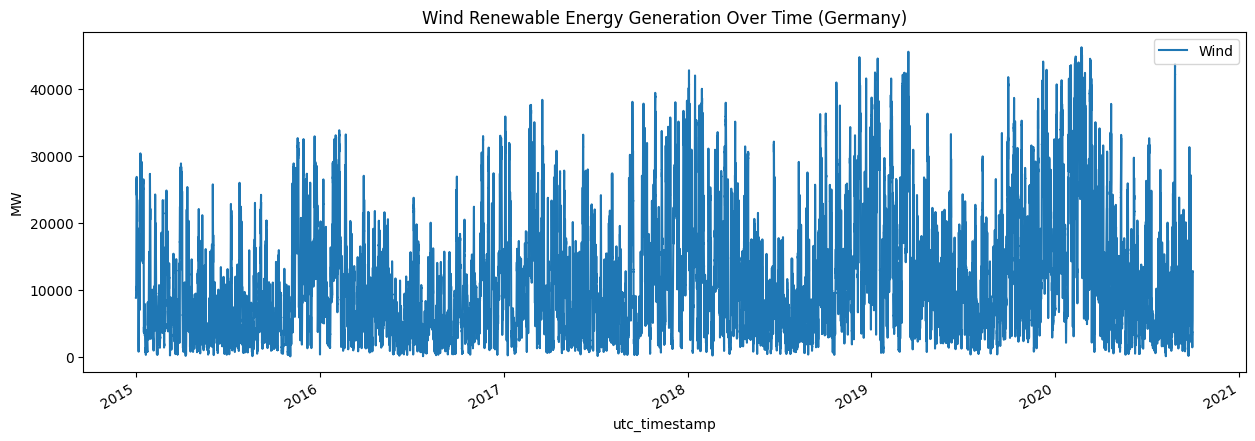

In [28]:
plt.figure(figsize=(15, 5))
data['Germany_wind_generation_actual'].plot(kind='line', label='Wind')
plt.title("Wind Renewable Energy Generation Over Time (Germany)")
plt.ylabel("MW")
plt.xlabel("utc_timestamp")
plt.legend()
plt.show()

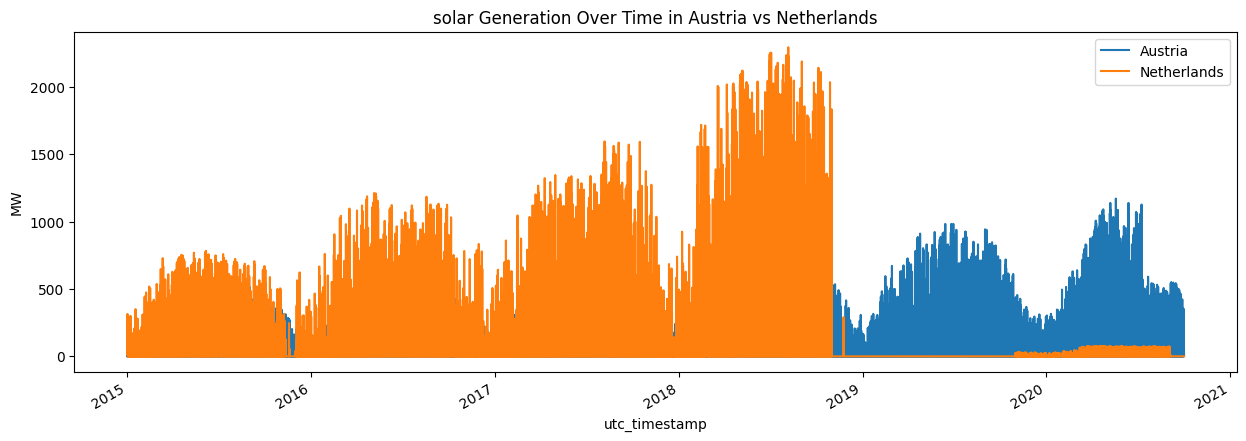

In [29]:
plt.figure(figsize=(15, 5))
data['Austria_solar_generation_actual'].plot(kind='line', label='Austria')
data['Netherlands_solar_generation_actual'].plot(kind='line', label='Netherlands')
plt.title("solar Generation Over Time in Austria vs Netherlands")  
plt.ylabel("MW")
plt.xlabel("utc_timestamp")
plt.legend()
plt.show()

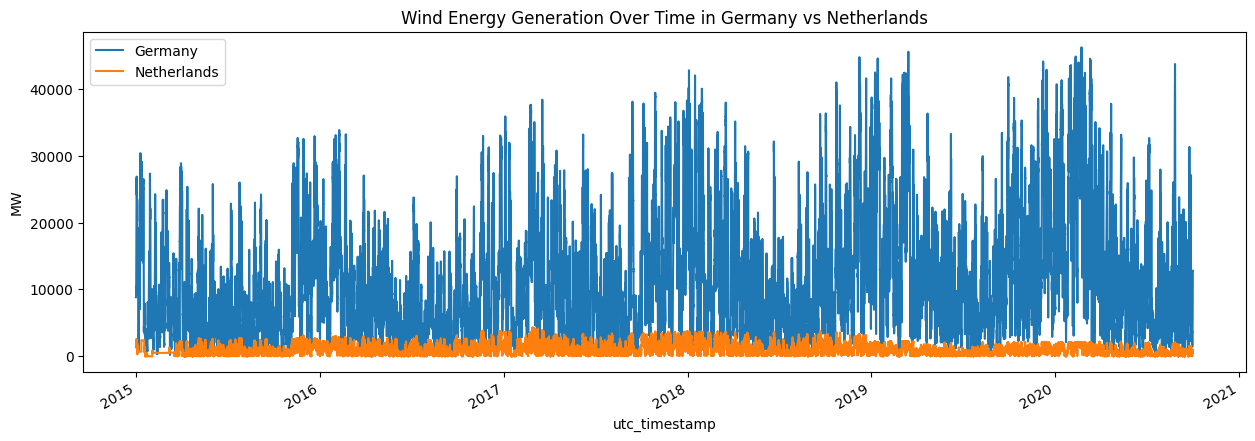

In [30]:
plt.figure(figsize=(15, 5))
data['Germany_wind_generation_actual'].plot(kind='line',label='Germany')
data['NL_wind_generation_actual'].plot(kind='line', label='Netherlands')
plt.title("Wind Energy Generation Over Time in Germany vs Netherlands")
plt.ylabel("MW")
plt.xlabel("utc_timestamp")
plt.legend()
plt.show()

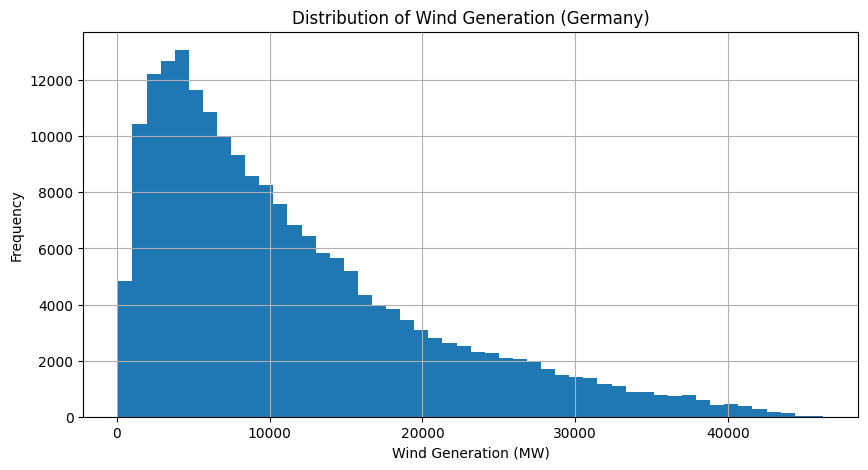

In [31]:
plt.figure(figsize=(10, 5))
data['Germany_wind_generation_actual'].hist(bins=50)
plt.title("Distribution of Wind Generation (Germany)")
plt.xlabel("Wind Generation (MW)")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x500 with 0 Axes>

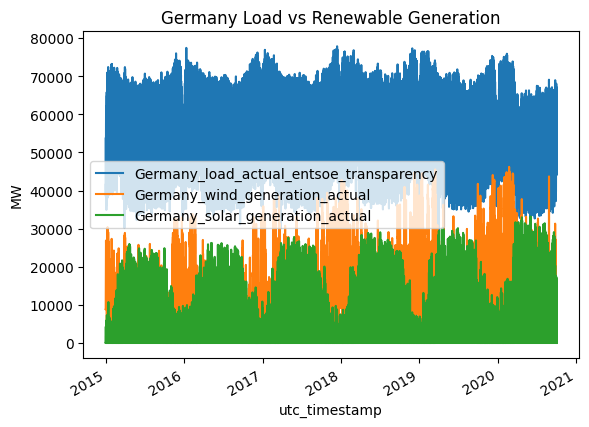

In [32]:
plt.figure(figsize=(15, 5))
data[['Germany_load_actual_entsoe_transparency', 'Germany_wind_generation_actual', 'Germany_solar_generation_actual']].plot(kind='line')
plt.title("Germany Load vs Renewable Generation")
plt.ylabel("MW")
plt.legend()
plt.show()

# TimeSeries Next Day Wind Genaration Predictions

In [33]:
#Time based features
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

In [34]:
#Lag features for shift/rolling 
data['wind_15min_ago'] = data['Germany_wind_generation_actual'].shift(1)
data['wind_24hr_ago'] = data['Germany_wind_generation_actual'].shift(96) 
data['avg_expected_wind'] = data['Germany_wind_generation_actual'].rolling(96).mean() 

In [35]:
#Drop NA values from Lag Features
data = data.dropna(subset=['wind_15min_ago','wind_24hr_ago','avg_expected_wind'])

In [36]:
features = ['hour', 'day_of_week', 'month', 'wind_15min_ago', 'wind_24hr_ago']
target = 'Germany_wind_generation_actual'

X = data[features]
y = data[target]

In [37]:
split_data = int(len(X) * 0.8)
X_train = X.iloc[:split_data]
X_test = X.iloc[split_data:]
y_train = y.iloc[:split_data]
y_test = y.iloc[split_data:]

In [38]:
rf_regression_model = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)
rf_regression_model.fit(X_train, y_train)
y_pred = rf_regression_model.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
print("mean_absolute_error:")
print(mae)

mean_absolute_error:
237.95064508979635


In [40]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("mean_squared_error:")
print(rmse)

mean_squared_error:
330.17828748513085


In [41]:
#calculating avgerage actual wind generation
mean_actual = y_test.mean()
mean_actual

14314.374569613656

In [42]:
#Percentage of mae
Percentage_mae=(mae / mean_actual) * 100
print(round(Percentage_mae,2))

1.66


In [43]:
#percentage of rmse
percentage_rmse=(rmse / mean_actual) * 100
print(round(percentage_rmse,2))

2.31


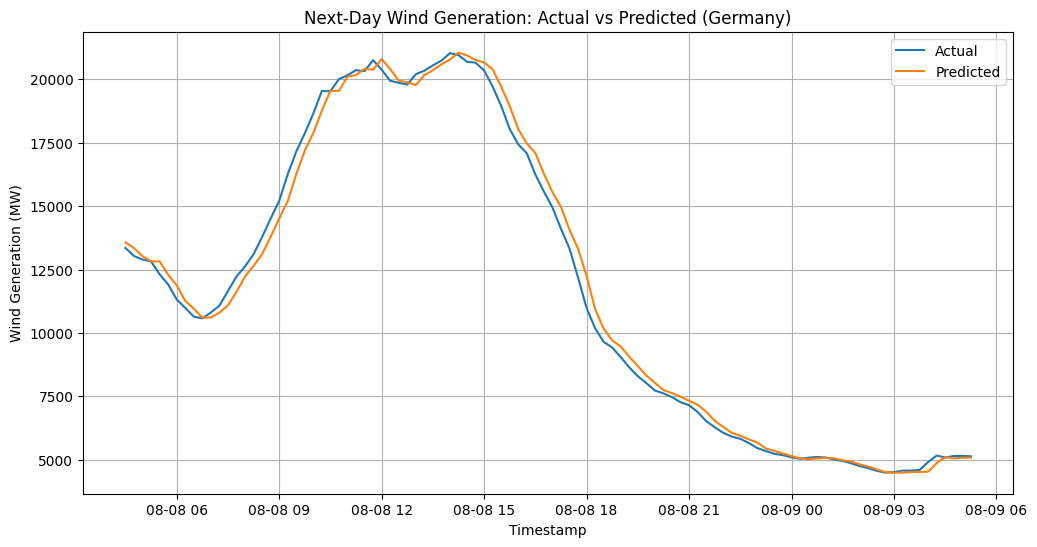

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index[:100], y_test.values[:100], label='Actual')
plt.plot(y_test.index[:100], y_pred[:100], label='Predicted')
plt.title("Next-Day Wind Generation: Actual vs Predicted (Germany)")
plt.xlabel("Timestamp")
plt.ylabel("Wind Generation (MW)")
plt.legend()
plt.grid(True)
plt.show()

# ShortFall Prediction

In [45]:
data['Germany_shortfall'] = data['Germany_wind_generation_actual'] < (data['avg_expected_wind'] * 0.8)
data['Germany_shortfall']

utc_timestamp
2015-01-02 00:15:00+00:00    False
2015-01-02 00:30:00+00:00    False
2015-01-02 00:45:00+00:00    False
2015-01-02 01:00:00+00:00    False
2015-01-02 01:15:00+00:00    False
                             ...  
2020-09-30 22:30:00+00:00    False
2020-09-30 22:45:00+00:00    False
2020-09-30 23:00:00+00:00    False
2020-09-30 23:15:00+00:00    False
2020-09-30 23:30:00+00:00    False
Name: Germany_shortfall, Length: 201502, dtype: bool

In [46]:
#1 = Shortfall, 0 = Normal
data['Germany_shortfall'] = (data['Germany_wind_generation_actual'] < (data['avg_expected_wind'] * 0.8)).astype(int)
data['Germany_shortfall']

utc_timestamp
2015-01-02 00:15:00+00:00    0
2015-01-02 00:30:00+00:00    0
2015-01-02 00:45:00+00:00    0
2015-01-02 01:00:00+00:00    0
2015-01-02 01:15:00+00:00    0
                            ..
2020-09-30 22:30:00+00:00    0
2020-09-30 22:45:00+00:00    0
2020-09-30 23:00:00+00:00    0
2020-09-30 23:15:00+00:00    0
2020-09-30 23:30:00+00:00    0
Name: Germany_shortfall, Length: 201502, dtype: int64

In [47]:
wind_shortfall_features = ['hour', 'day_of_week', 'month', 'wind_15min_ago', 'wind_24hr_ago', 'avg_expected_wind']
wind_shortfall_target = 'Germany_shortfall'

X_wind_shortfall = data[wind_shortfall_features]
y_wind_shortfall = data[wind_shortfall_target]

In [48]:
split_data = int(len(X_wind_shortfall) * 0.8)
X_train_wind_shortfall = X_wind_shortfall.iloc[:split_data]
X_test_wind_shortfall = X_wind_shortfall.iloc[split_data:]
y_train_wind_shortfall = y_wind_shortfall.iloc[:split_data]
y_test_wind_shortfall = y_wind_shortfall.iloc[split_data:]

In [49]:
rf_classifier_model = RandomForestClassifier(n_estimators=100,max_depth=5, max_features='sqrt',random_state=42)
rf_classifier_model.fit(X_train_wind_shortfall, y_train_wind_shortfall)
y_pred_wind_shortfall = rf_classifier_model.predict(X_test_wind_shortfall)

In [50]:
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test_wind_shortfall, y_pred_wind_shortfall))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     26913
           1       0.94      0.60      0.73     13388

    accuracy                           0.85     40301
   macro avg       0.89      0.79      0.82     40301
weighted avg       0.87      0.85      0.84     40301



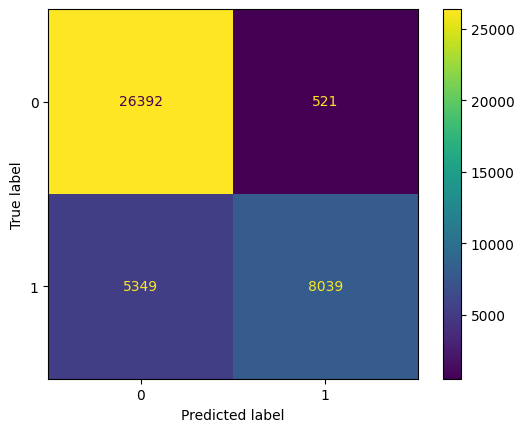

In [61]:
#Plot the confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test_wind_shortfall, y_pred_wind_shortfall)
plt.show()

# Outliers Detections

In [52]:
#Creating a smaller data frame with two variables
data_outlier = data[['Germany_wind_generation_actual','Germany_load_actual_entsoe_transparency']]
data_outlier.describe()

,Germany_wind_generation_actual,Germany_load_actual_entsoe_transparency
count,201502.000000,201502.000000
mean,11552.841951,55497.423107
std,9079.021002,10040.554255
min,104.660000,29158.120000
25%,4508.065000,47103.677500
50%,9009.675000,55128.025000
75%,16129.360000,64341.122500
max,46205.630000,77852.940000


In [53]:
#Initialize DBSCAN model
dbscanModel = DBSCAN(eps=1500, min_samples=5)

#Fit the model
dbscanModel = dbscanModel.fit(data_outlier)

In [54]:
clusters= dbscanModel.fit_predict(data_outlier)
clusters = pd.Categorical(clusters)
data_outlier['Cluster'] = clusters
print(data_outlier['Cluster'].value_counts())

Cluster
0     201499
-1         3
Name: count, dtype: int64


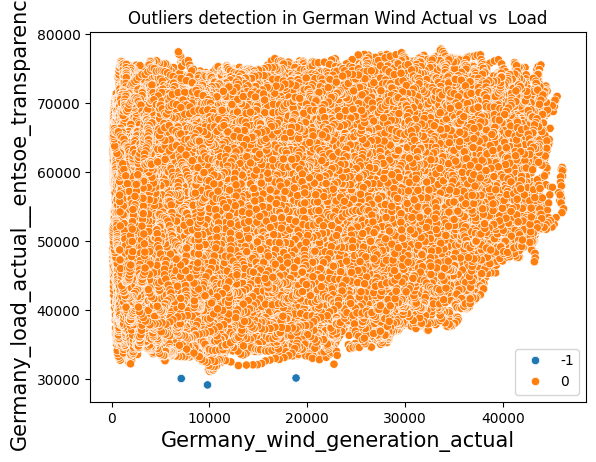

In [64]:
#Visualize scaled outliers
p = sns.scatterplot(data=data_outlier, x='Germany_wind_generation_actual',y='Germany_load_actual_entsoe_transparency', hue=clusters)
p.set_xlabel('Germany_wind_generation_actual', fontsize=15);
p.set_ylabel('Germany_load_actual__entsoe_transparency', fontsize=15)
plt.title("Outliers detection in German Wind Actual vs  Load")
plt.show()